<a href="https://colab.research.google.com/github/vigneshNagaraja/Final-project-Waste-Management-/blob/main/Another_copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload the ZIP file manually


Saving archive (4).zip to archive (4).zip


In [ ]:
import zipfile
import os

dataset_path = "/content/archive (4).zip"  # Replace with your uploaded filename
extract_path = "/content/extracted_data"

# Extract if not already extracted
if not os.path.exists(extract_path):
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Dataset extracted to {extract_path}")
else:
    print("✅ Dataset already extracted")


✅ Dataset extracted to /content/extracted_data


In [ ]:
ls /dev/video*


ls: cannot access '/dev/video*': No such file or directory


In [ ]:
pip install --upgrade opencv-python opencv-python-headless


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Update with the correct paths to your training and testing data
train_data_dir = '/content/extracted_data'  # Replace with the actual path
test_data_dir = '/content/extracted_data'  # Replace with the actual path


train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 2527 images belonging to 1 classes.
Found 2527 images belonging to 1 classes.


In [ ]:
!ls /content/extracted_data/train
!ls /content/extracted_data/test


ls: cannot access '/content/extracted_data/train': No such file or directory
ls: cannot access '/content/extracted_data/test': No such file or directory


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Correct paths for the training and testing data
train_data_dir = '/content/extracted_data' # Path to your 'train' directory
test_data_dir = '/content/extracted_data'    # Path to your 'test' directory

# Load data using the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

# Print the number of images found and the number of classes
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")
print(f"Found {test_generator.samples} images belonging to {test_generator.num_classes} classes.")


Found 2527 images belonging to 1 classes.
Found 2527 images belonging to 1 classes.
Found 2527 images belonging to 1 classes.
Found 2527 images belonging to 1 classes.


In [ ]:
import tensorflow as tf

# Define a simple CNN model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, kernel size of 3x3, and 'relu' activation function
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),

    # MaxPooling to reduce spatial dimensions
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Another Convolutional layer with 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling layer again
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the output from the previous layers to feed it into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layer with 128 units and 'relu' activation
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')  # Number of output classes
])

# Print model summary to check the layers
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil

# Directories to organize the dataset
base_dir = '/content/extracted_data/dataset-resized/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# List of classes you have in the dataset
classes = ['plastic', 'paper', 'metal', 'glass']

# Create subdirectories in both 'train' and 'test' directories
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Assuming the images are in a general directory '/content/extracted_data/dataset-resized/'
# Let's move the images into 'train' and 'test' folders for each class

# Move images for each class into train/test directories (for demonstration)
for class_name in classes:
    source_class_dir = os.path.join(base_dir, class_name)

    if os.path.isdir(source_class_dir):
        images = os.listdir(source_class_dir)

        # Splitting images for training (first half) and testing (second half)
        train_images = images[:len(images)//2]
        test_images = images[len(images)//2:]

        # Move the training images
        for image in train_images:
            shutil.move(os.path.join(source_class_dir, image), os.path.join(train_dir, class_name, image))

        # Move the testing images
        for image in test_images:
            shutil.move(os.path.join(source_class_dir, image), os.path.join(test_dir, class_name, image))

print("Images have been successfully organized.")


Images have been successfully organized.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# Step 1: Define the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Paths to your 'train' and 'test' directories
train_data_dir = '/content/extracted_data/dataset-resized/train'
test_data_dir = '/content/extracted_data/dataset-resized/test'

# Step 2: Load data using the ImageDataGenerator with the added "no_trash" class
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

# Step 3: Define a CNN model with transfer learning using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the convolutional layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes now: plastic, paper, metal, glass, no_trash
])

# Step 4: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,  # Testing data generator
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Step 6: Save the model
model.save('waste_classification_model_with_no_trash.keras')

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Found 993 images belonging to 4 classes.
Found 994 images belonging to 4 classes.
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 445s 15s/step - accuracy: 0.3683 - loss: 1.8598 - val_accuracy: 0.6250 - val_loss: 0.8956
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 262s 8s/step - accuracy: 0.5625 - loss: 0.9263 - val_accuracy: 0.6290 - val_loss: 0.8938
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 441s 14s/step - accuracy: 0.5250 - loss: 1.0426 - val_accuracy: 0.6562 - val_loss: 0.8211
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 261s 8s/step - accuracy: 0.6250 - loss: 0.9206 - val_accuracy: 0.6633 - val_loss: 0.8179
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 479s 14s/step - accuracy: 0.6145 - loss: 0.9013 - val_accuracy: 0.7026 - val_loss: 0.7237
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 262s 9s/step - accuracy: 0.5625 - loss: 1.0058 - val_accuracy: 0.7016 - val_loss: 0.7236
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 442s 14s/step - accuracy: 0.6760 - loss: 0.7898 - val_accuracy: 0.7157 - val_loss: 0.6985
Epoch 8/10
31/31 ━━━━━━━━

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# Set random seed for reproducibility
import numpy as np
import random

seed_value = 42  # Set a fixed seed
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Step 1: Define the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Paths to your 'train' and 'test' directories
train_data_dir = '/content/extracted_data/dataset-resized/train'
test_data_dir = '/content/extracted_data/dataset-resized/test'

# Step 2: Load data using the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

# Step 3: Define a CNN model with transfer learning using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the convolutional layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes now: plastic, paper, metal, glass (no_trash excluded)
])

# Step 4: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train Model
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,  # Testing data generator
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Step 6: Save the model
model.save('waste_classification_model_with_no_trash.keras')

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Found 993 images belonging to 4 classes.
Found 994 images belonging to 4 classes.
Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 448s 15s/step - accuracy: 0.4408 - loss: 1.6412 - val_accuracy: 0.4607 - val_loss: 1.7758
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 261s 8s/step - accuracy: 0.4688 - loss: 1.4999 - val_accuracy: 0.4808 - val_loss: 1.6833
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 443s 14s/step - accuracy: 0.5789 - loss: 1.1255 - val_accuracy: 0.5262 - val_loss: 1.7677
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 261s 8s/step - accuracy: 0.5625 - loss: 1.0399 - val_accuracy: 0.5121 - val_loss: 1.8426
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 480s 14s/step - accuracy: 0.6335 - loss: 0.9873 - val_accuracy: 0.5917 - val_loss: 1.1502
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 228s 7s/step - accuracy: 0.6562 - loss: 0.9615 - val_accuracy: 0.6038 - val_loss: 1.0861
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 502s 16s/step - accuracy: 0.6367 - loss: 0.9698 - val_accuracy: 0.6532 - val_loss: 1.0111
Epoch 8/20
31/31 ━━━━━━━━

In [ ]:
import tensorflow as tf
import numpy as np
import random

seed_value = 42  # Set a fixed seed
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision
import random
import numpy as np

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Use Mixed Precision for faster training
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data_dir = '/content/extracted_data/dataset-resized/train'
test_data_dir = '/content/extracted_data/dataset-resized/test'

# Load training and testing data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(100, 100),  # Reduced image size for faster processing
    batch_size=16,           # Reduced batch size
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='categorical'
)

# Load MobileNetV2 with pre-trained weights, without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base_model.trainable = False  # Freeze the base model

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: plastic, paper, metal, glass
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping to stop training when no improvement
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Found 993 images belonging to 4 classes.
Found 994 images belonging to 4 classes.


<ipython-input-17-6c9e4e76aed8>:50: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.3961 - loss: 5.3093 - val_accuracy: 0.5958 - val_loss: 5.6669
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5000 - loss: 7.4343 - val_accuracy: 0.5917 - val_loss: 5.5989
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5924 - loss: 5.6377 - val_accuracy: 0.5877 - val_loss: 5.8041
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4375 - loss: 9.0664 - val_accuracy: 0.5655 - val_loss: 6.1341
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5577 - loss: 6.4448 - val_accuracy: 0.6210 - val_loss: 5.6192
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.0000e+00 - loss: 16.1181 - val_accuracy: 0.6190 - val_loss: 5.6032
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6449 - loss: 5.1360 - val_accuracy: 0.6855 - val_loss: 4.5995
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision
import random
import numpy as np

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Use Mixed Precision for faster training
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data_dir = '/content/extracted_data/dataset-resized/train'
test_data_dir = '/content/extracted_data/dataset-resized/test'

# Load training and testing data with smaller input size
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),  # Reduced image size for faster processing
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)

# Load MobileNetV2 with pre-trained weights, include_top=False, and reduce layers for fine-tuning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Freeze the base model initially

# Build the model with a smaller architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),  # Reduced number of units
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: plastic, paper, metal, glass
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping to stop training when no improvement
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model with fewer epochs (e.g., 5)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Found 993 images belonging to 4 classes.
Found 994 images belonging to 4 classes.


<ipython-input-18-577c2a017085>:50: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 45s 631ms/step - accuracy: 0.3960 - loss: 2.0248 - val_accuracy: 0.5927 - val_loss: 1.1518
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.3125 - loss: 1.4971 - val_accuracy: 0.5998 - val_loss: 1.1339
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 586ms/step - accuracy: 0.6410 - loss: 0.9160 - val_accuracy: 0.6976 - val_loss: 0.8235
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.7500 - loss: 1.0577 - val_accuracy: 0.6966 - val_loss: 0.8266
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 83s 925ms/step - accuracy: 0.7142 - loss: 0.7484 - val_accuracy: 0.6784 - val_loss: 0.8283
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.6791 - loss: 0.8518
Test accuracy: 0.6971830725669861, Test loss: 0.8241849541664124


Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.4882 - loss: 1.4927 - val_accuracy: 0.6423 - val_loss: 1.6711
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7131 - loss: 0.8291 - val_accuracy: 0.6890 - val_loss: 1.4502
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7549 - loss: 0.7206 - val_accuracy: 0.6834 - val_loss: 1.4020
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7831 - loss: 0.6016 - val_accuracy: 0.7250 - val_loss: 1.2223
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7952 - loss: 0.5660 - val_accuracy: 0.7491 - val_loss: 0.9716
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.8000 - loss: 0.5555 - val_accuracy: 0.7103 - val_loss: 1.3720
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8250 - loss: 0.4741 - val_accuracy: 0.7384 - val_loss: 1.9725
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8382 - loss: 0.4367 - val_accuracy: 0.7432 - val_los

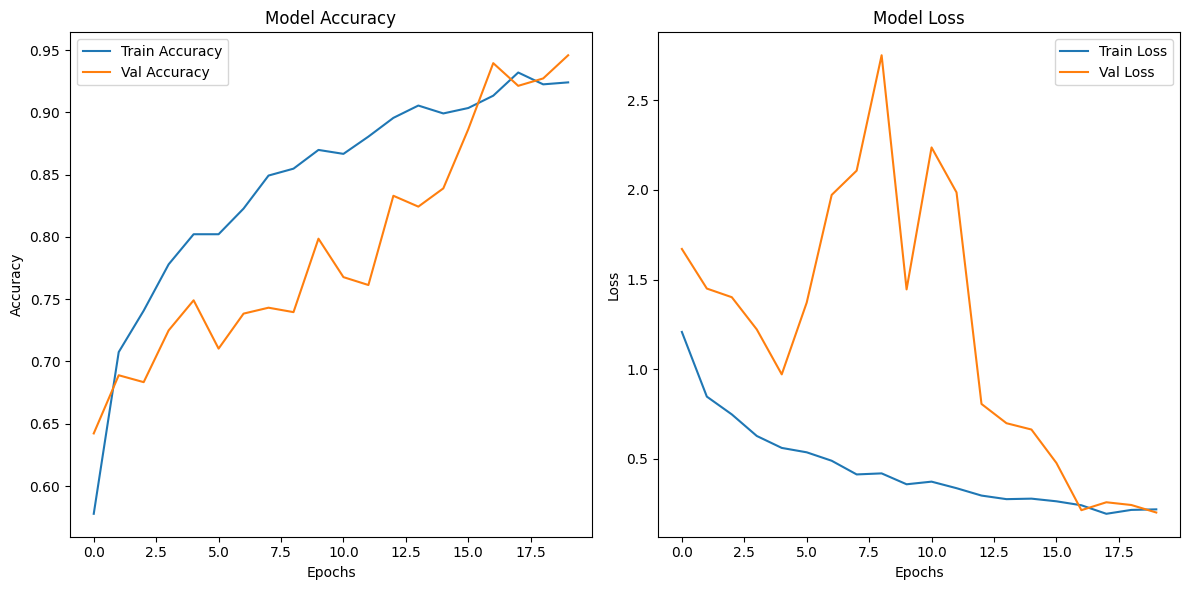

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

train_dir = '/content/extracted_data/dataset-resized'
val_dir = '/content/extracted_data/dataset-resized'
test_dir = '/content/extracted_data/dataset-resized'

img_height, img_width = 128, 128
batch_size = 32
epochs = 20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=100, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, class_weight=class_weights_dict)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
import random

# Paths for dataset and models
dataset_path = '/content/extracted_data/dataset-resized'
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

# Create 'train' and 'test' directories if they do not exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# List of class folders (assuming these are directly in your dataset path)
class_folders = ['plastic', 'metal', 'paper', 'glass', 'trash', 'cardboard']

# Split data from each class folder into train and test
for class_name in class_folders:
    class_path = os.path.join(dataset_path, class_name)

    # Create class directories in 'train' and 'test'
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    if not os.path.exists(train_class_dir):
        os.makedirs(train_class_dir)
    if not os.path.exists(test_class_dir):
        os.makedirs(test_class_dir)

    # Get all images in the current class folder
    all_images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Shuffle and split the images
    random.shuffle(all_images)
    split_index = int(0.8 * len(all_images))  # 80% for training, 20% for testing

    # Move files to train and test directories
    for img in all_images[:split_index]:
        shutil.move(os.path.join(class_path, img), os.path.join(train_class_dir, img))

    for img in all_images[split_index:]:
        shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Verify the directories
print("Train directory contents:", os.listdir(train_dir))
print("Test directory contents:", os.listdir(test_dir))

# Now proceed with your image generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Load the .h5 model
model_h5 = tf.keras.models.load_model('/content/waste_classification_model.h5')

# Evaluate the .h5 model on the test set
test_loss, test_acc = model_h5.evaluate(test_generator, verbose=2)
print(f"Test accuracy for .h5 model: {test_acc}")

# Load the .tflite model for mobile/embedded inference
interpreter = tf.lite.Interpreter(model_path='/content/waste_classification_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to classify waste using the .h5 model
def classify_waste_h5(image_path, model, class_labels):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))  # Resize to match input shape
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    print(f"Predicted Waste Type (.h5 model): {class_labels[predicted_class]}")

    # Display image with prediction
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()

# Function to classify waste using the .tflite model
def classify_waste_tflite(image_path, interpreter, input_details, output_details, class_labels):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))  # Resize to match input shape
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0).astype(np.float32)  # Add batch dimension

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], image)

    # Run inference
    interpreter.invoke()

    # Get prediction results
    output = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(output)

    print(f"Predicted Waste Type (TFLite model): {class_labels[predicted_class]}")


Train directory contents: ['plastic', 'metal', 'paper', 'glass', 'trash', 'cardboard']
Test directory contents: ['plastic', 'metal', 'paper', 'glass', 'trash', 'cardboard']
Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 - 10s - 613ms/step - accuracy: 0.9547 - loss: 0.1457
Test accuracy for .h5 model: 0.9547244310379028


Train directory contents: ['plastic', 'metal', 'paper', 'glass', 'trash', 'cardboard']
Test directory contents: ['plastic', 'metal', 'paper', 'glass', 'trash', 'cardboard']
Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


16/16 - 12s - 741ms/step - accuracy: 0.9547 - loss: 0.1457
Test accuracy for .h5 model: 0.9547244310379028
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step

Classification Report for .h5 model:

              precision    recall  f1-score   support

   cardboard       1.00      0.99      0.99        81
       glass       0.98      0.93      0.95       101
       metal       1.00      0.90      0.95        82
       paper       0.99      0.96      0.97       119
     plastic       0.84      0.98      0.90        97
       trash       0.93      1.00      0.97        28

    accuracy                           0.95       508
   macro avg       0.96      0.96      0.96       508
weighted avg       0.96      0.95      0.96       508



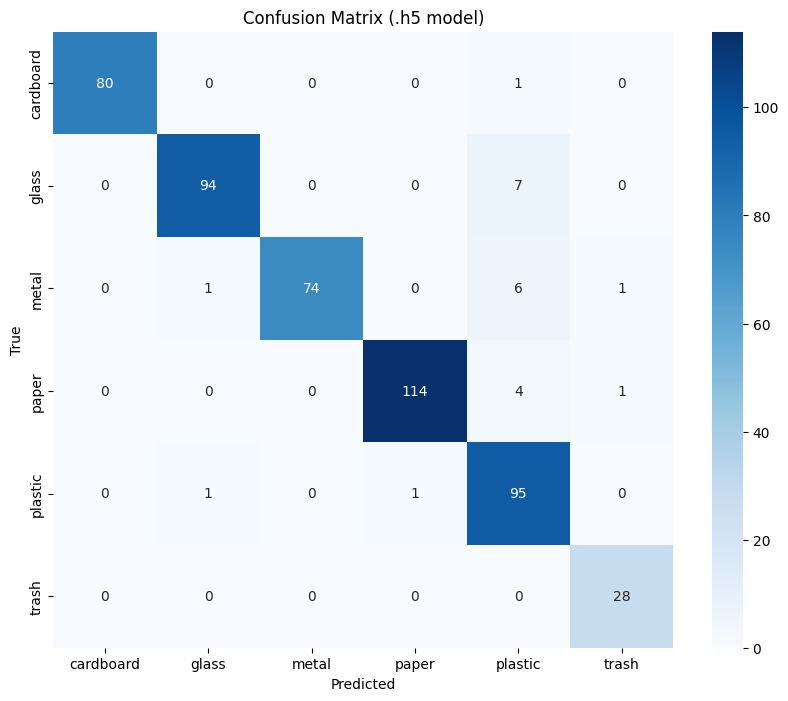

In [ ]:
  import os
  import shutil
  import random
  import tensorflow as tf
  import numpy as np
  import cv2
  import matplotlib.pyplot as plt
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from sklearn.metrics import classification_report, confusion_matrix
  import seaborn as sns

  # Paths for dataset and models
  dataset_path = '/content/extracted_data/dataset-resized'
  train_dir = os.path.join(dataset_path, 'train')
  test_dir = os.path.join(dataset_path, 'test')

  # Create 'train' and 'test' directories if they do not exist
  if not os.path.exists(train_dir):
      os.makedirs(train_dir)
  if not os.path.exists(test_dir):
      os.makedirs(test_dir)

  # List of class folders (assuming these are directly in your dataset path)
  class_folders = ['plastic', 'metal', 'paper', 'glass', 'trash', 'cardboard']

  # Split data from each class folder into train and test
  for class_name in class_folders:
      class_path = os.path.join(dataset_path, class_name)

      # Create class directories in 'train' and 'test'
      train_class_dir = os.path.join(train_dir, class_name)
      test_class_dir = os.path.join(test_dir, class_name)

      if not os.path.exists(train_class_dir):
          os.makedirs(train_class_dir)
      if not os.path.exists(test_class_dir):
          os.makedirs(test_class_dir)

      # Get all images in the current class folder
      all_images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

      # Shuffle and split the images
      random.shuffle(all_images)
      split_index = int(0.8 * len(all_images))  # 80% for training, 20% for testing

      # Move files to train and test directories
      for img in all_images[:split_index]:
          shutil.move(os.path.join(class_path, img), os.path.join(train_class_dir, img))

      for img in all_images[split_index:]:
          shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))

  # Verify the directories
  print("Train directory contents:", os.listdir(train_dir))
  print("Test directory contents:", os.listdir(test_dir))

  # Now proceed with your image generators
  train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                    horizontal_flip=True, fill_mode='nearest')

  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(128, 128),
      batch_size=32,
      class_mode='categorical')

  test_generator = test_datagen.flow_from_directory(
      test_dir,
      target_size=(128, 128),
      batch_size=32,
      class_mode='categorical',
      shuffle=False)

  # Load the .h5 model
  model_h5 = tf.keras.models.load_model('/content/waste_classification_model.h5')

  # Evaluate the .h5 model on the test set
  test_loss, test_acc = model_h5.evaluate(test_generator, verbose=2)
  print(f"Test accuracy for .h5 model: {test_acc}")

  # Predict using the .h5 model
  predictions = model_h5.predict(test_generator)
  predicted_classes = np.argmax(predictions, axis=1)

  # Classification report and confusion matrix for .h5 model
  print("\nClassification Report for .h5 model:\n")
  print(classification_report(test_generator.classes, predicted_classes, target_names=test_generator.class_indices.keys()))

  # Confusion matrix for .h5 model
  conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
  plt.title("Confusion Matrix (.h5 model)")
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  # Load the .tflite model for mobile/embedded inference
  interpreter = tf.lite.Interpreter(model_path='/content/waste_classification_model.tflite')
  interpreter.allocate_tensors()

  # Get input and output tensor details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  # Function to classify waste using the .h5 model
  def classify_waste_h5(image_path, model, class_labels):
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128, 128))  # Resize to match input shape
      image = image / 255.0  # Normalize
      image = np.expand_dims(image, axis=0)  # Add batch dimension

      prediction = model.predict(image)
      predicted_class = np.argmax(prediction)

      print(f"Predicted Waste Type (.h5 model): {class_labels[predicted_class]}")

      # Display image with prediction
      plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
      plt.title(f"Predicted: {class_labels[predicted_class]}")
      plt.axis('off')
      plt.show()

  # Function to classify waste using the .tflite model
  def classify_waste_tflite(image_path, interpreter, input_details, output_details, class_labels):
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128, 128))  # Resize to match input shape
      image = image / 255.0  # Normalize
      image = np.expand_dims(image, axis=0).astype(np.float32)  # Add batch dimension

      # Set input tensor
      interpreter.set_tensor(input_details[0]['index'], image)

      # Run inference
      interpreter.invoke()

      # Get prediction results
      output = interpreter.get_tensor(output_details[0]['index'])
      predicted_class = np.argmax(output)

      print(f"Predicted Waste Type (TFLite model): {class_labels[predicted_class]}")


In [ ]:
import tensorflow as tf

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpmnmx8jks'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  139783537994896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537995664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537997392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537997008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537995856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537997584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537996048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537997968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537996240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783537996816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1397835379983

In [ ]:
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')  # Replace with your model's path

# Allocate tensors to prepare the model for inference
interpreter.allocate_tensors()

# Get input details (you will use these to set the input tensor)
input_details = interpreter.get_input_details()
print(f"Input shape: {input_details[0]['shape']}")
print(f"Input dtype: {input_details[0]['dtype']}")


Input shape: [  1 128 128   3]
Input dtype: <class 'numpy.float32'>


In [ ]:
# Get output details (this will give you information about the output tensor)
output_details = interpreter.get_output_details()

# Retrieve the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Check the output shape and dtype
print(f"Output shape: {output_data.shape}")
print(f"Output dtype: {output_data.dtype}")


Output shape: (1, 6)
Output dtype: float32


In [ ]:
# Assuming the output is a classification result
predicted_class = np.argmax(output_data, axis=1)
print(f"Predicted class index: {predicted_class}")


Predicted class index: [4]


In [ ]:
from google.colab import files
uploaded = files.upload()
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')  # Replace with your model's path
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Define a function for preprocessing images (resize and normalize)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype(np.float32)  # Ensure the correct data type
    img_array /= 255.0  # Normalize if your model was trained with normalized images
    return img_array

# Directory of test images (Fixing the path error here)
test_dir = '/content/Non-Biodergable .png'  # Specify the correct image file path
correct_predictions = 0
total_predictions = 0

# Loop through each image in the test directory
# If you're working with only one image, skip the loop and process that image directly
img_path = test_dir  # Use the uploaded image path directly
true_label = 1  # Set the true label, based on your understanding (e.g., non-biodegradable)

# Preprocess the image
img_array = preprocess_image(img_path)

# Set the input tensor for inference
interpreter.set_tensor(input_details[0]['index'], img_array)

# Run inference
interpreter.invoke()

# Get the model's prediction
output_data = interpreter.get_tensor(output_details[0]['index'])

# Predict the class with the highest probability
predicted_label = np.argmax(output_data)

# Compare prediction with the true label
if predicted_label == true_label:
    correct_predictions += 1
total_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")

# Check the uploaded file name (optional, if you want to print the uploaded image)
print(f"Uploaded image: {img_path}")


Saving Non-Biodergable .png to Non-Biodergable .png
Accuracy: 0.00%
Uploaded image: /content/Non-Biodergable .png


In [ ]:
# Print the raw output data to see the probabilities for each class
print(f"Model raw output: {output_data}")

# Predict the class with the highest probability
predicted_label = np.argmax(output_data)

# Print the predicted label to see which class is predicted
print(f"Predicted class: {predicted_label}")

# Compare prediction with the true label
if predicted_label == true_label:
    correct_predictions += 1
total_predictions += 1


Model raw output: [[9.57797006e-14 3.89773419e-13 9.99886513e-01 1.13431925e-04
  1.04763132e-09 3.62902438e-12]]
Predicted class: 2


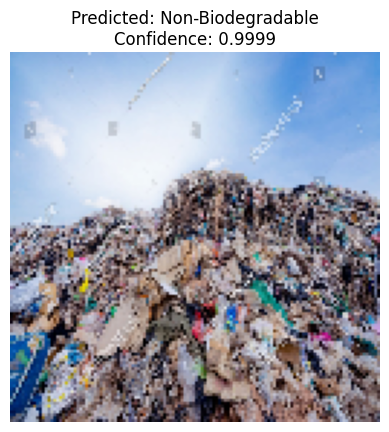

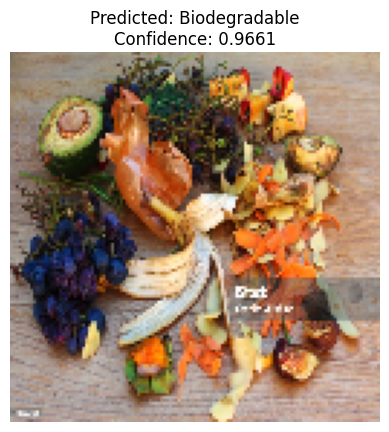

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import os

# Define constants
IMG_SIZE = (128, 128)  # Resize image to match model input size

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')  # Replace with your model's path
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Define a function for preprocessing images (resize and normalize)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype(np.float32)  # Ensure the correct data type
    img_array /= 255.0  # Normalize if your model was trained with normalized images
    return img_array

# Function to display images with predictions
def show_image_with_prediction(image_path, predicted_class, confidence):
    img = image.load_img(image_path, target_size=IMG_SIZE)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.4f}")
    plt.show()

# List of image paths to test
image_paths = ['/content/Non-Biodergable .png', '/content/Biodergable image.png']  # Add both images to the list

# Loop through uploaded images
for img_path in image_paths:
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Set the input tensor for inference
    interpreter.set_tensor(input_details[0]['index'], img_array)

    # Run inference
    interpreter.invoke()

    # Get the model's output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Get the predicted class (index of highest probability)
    confidence = np.max(output_data)  # Get the highest confidence score
    predicted_class = "Non-Biodegradable" if np.argmax(output_data) == 2 else "Biodegradable"

    # Display the image with the prediction and confidence
    show_image_with_prediction(img_path, predicted_class, confidence)


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')  # Replace with your model's path

# Allocate tensors to prepare the model for inference
interpreter.allocate_tensors()

# Get input details (you will use these to set the input tensor)
input_details = interpreter.get_input_details()
print(f"Input shape: {input_details[0]['shape']}")
print(f"Input dtype: {input_details[0]['dtype']}")

# Load and preprocess the uploaded image
img_path = 'Non-Biodergable .png'  # Image you uploaded
img = Image.open(img_path)  # Open the image

# Convert to RGB (removes alpha channel if present)
img = img.convert('RGB')

# Resize image to match input shape
img = img.resize((128, 128))  # Resize image to match input size (128, 128)
img_array = np.array(img, dtype=np.float32)  # Convert to numpy array and float32

# Verify the shape of the image
print(f"Original image array shape: {img_array.shape}")

# If img_array's shape is (128, 128, 3), add a batch dimension
if len(img_array.shape) == 3:
    img_array = np.expand_dims(img_array, axis=0)  # Adding batch dimension, shape becomes (1, 128, 128, 3)

# Normalize the image if required (adjust this according to your model's requirement)
img_array = img_array / 255.0  # Normalize values to [0, 1]

# Verify the shape after adding batch dimension
print(f"Processed image array shape: {img_array.shape}")

# Set the input tensor for inference
interpreter.set_tensor(input_details[0]['index'], img_array)

# Run inference
interpreter.invoke()

# Get the output tensor
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Check the output shape and dtype
print(f"Output shape: {output_data.shape}")
print(f"Output dtype: {output_data.dtype}")

# Show the model's prediction
print("Model's prediction:", output_data)


Input shape: [  1 128 128   3]
Input dtype: <class 'numpy.float32'>
Original image array shape: (128, 128, 3)
Processed image array shape: (1, 128, 128, 3)
Output shape: (1, 6)
Output dtype: float32
Model's prediction: [[4.0921617e-11 4.8258975e-10 9.9794072e-01 2.0591312e-03 1.3838385e-07
  7.6055356e-10]]
